In [1]:
import pandas as pd
import numpy as np

# 导入可视化库
import matplotlib.pyplot as plt
import seaborn as sns

# 设置可视化风格
sns.set(style="whitegrid")
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("库导入成功，环境准备就绪！")

库导入成功，环境准备就绪！


In [2]:
# 读取 CSV 文件
df = pd.read_csv("ecommerce_transactions.csv")

# 查看前 5 行数据
print(df.head())

   Transaction_ID        User_Name  Age  Country Product_Category  \
0               1         Ava Hall   63   Mexico         Clothing   
1               2      Sophia Hall   59    India           Beauty   
2               3  Elijah Thompson   26   France            Books   
3               4     Elijah White   43   Mexico           Sports   
4               5       Ava Harris   48  Germany           Beauty   

   Purchase_Amount Payment_Method Transaction_Date  
0           780.69     Debit Card       2023-04-14  
1           738.56         PayPal       2023-07-30  
2           178.34    Credit Card       2023-09-17  
3           401.09            UPI       2023-06-21  
4           594.83    Net Banking       2024-10-29  


In [3]:
print("=== 数据基本信息 ===")
print(f"总交易记录数: {len(df):,}")
print(f"数据列数: {df.shape[1]}")
print(f"列名: {list(df.columns)}")

print("\n=== 用户分析 ===")
# 唯一用户数
unique_users = df['User_Name'].nunique()
print(f"唯一用户数: {unique_users}")

# 每个用户的交易次数
user_transaction_counts = df['User_Name'].value_counts()
print(f"每个用户交易次数统计:")
print(f"  最小值: {user_transaction_counts.min()}")
print(f"  最大值: {user_transaction_counts.max()}")
print(f"  平均值: {user_transaction_counts.mean():.2f}")
print(f"  中位数: {user_transaction_counts.median():.2f}")

# 交易次数分布
print("\n=== 交易次数分布 ===")
transaction_dist = user_transaction_counts.describe()
print(transaction_dist)

# 验证复购率
print("\n=== 复购率验证 ===")
single_purchase_users = (user_transaction_counts == 1).sum()
multi_purchase_users = (user_transaction_counts > 1).sum()

print(f"只购买1次的用户: {single_purchase_users}")
print(f"购买多次的用户: {multi_purchase_users}")
print(f"复购率: {(multi_purchase_users / unique_users * 100):.2f}%")

# 展示部分用户的交易情况
print("\n=== 随机5个用户的交易次数 ===")
sample_users = user_transaction_counts.head(5)
for user, count in sample_users.items():
    print(f"{user}: {count}次交易")

# 数据完整性检查
print("\n=== 数据质量检查 ===")
print("缺失值统计:")
missing_data = df.isnull().sum()
for col, missing in missing_data.items():
    if missing > 0:
        print(f"  {col}: {missing}")
    
if missing_data.sum() == 0:
    print("  无缺失值")

# 时间范围检查
print("\n=== 时间范围 ===")
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
print(f"最早交易日期: {df['Transaction_Date'].min()}")
print(f"最晚交易日期: {df['Transaction_Date'].max()}")
print(f"时间跨度: {(df['Transaction_Date'].max() - df['Transaction_Date'].min()).days} 天")

# 计算真实的平均每用户交易数
avg_transactions_per_user = len(df) / unique_users
print(f"\n=== 关键发现 ===")
print(f"平均每用户交易数: {avg_transactions_per_user:.0f}")
print(f"这确实是一个特殊的数据集：")
print(f"- {unique_users}个用户产生了{len(df):,}条交易记录")
print(f"- 每个用户都有{user_transaction_counts.min()}-{user_transaction_counts.max()}次交易")
print(f"- 没有任何用户只交易1次，复购率为100%")

=== 数据基本信息 ===
总交易记录数: 50,000
数据列数: 8
列名: ['Transaction_ID', 'User_Name', 'Age', 'Country', 'Product_Category', 'Purchase_Amount', 'Payment_Method', 'Transaction_Date']

=== 用户分析 ===
唯一用户数: 100
每个用户交易次数统计:
  最小值: 435
  最大值: 568
  平均值: 500.00
  中位数: 500.50

=== 交易次数分布 ===
count    100.000000
mean     500.000000
std       22.910895
min      435.000000
25%      486.750000
50%      500.500000
75%      514.250000
max      568.000000
Name: count, dtype: float64

=== 复购率验证 ===
只购买1次的用户: 0
购买多次的用户: 100
复购率: 100.00%

=== 随机5个用户的交易次数 ===
Sophia Harris: 568次交易
Emma Clark: 546次交易
Noah Anderson: 545次交易
James Allen: 545次交易
James Lewis: 543次交易

=== 数据质量检查 ===
缺失值统计:
  无缺失值

=== 时间范围 ===
最早交易日期: 2023-03-09 00:00:00
最晚交易日期: 2025-03-08 00:00:00
时间跨度: 730 天

=== 关键发现 ===
平均每用户交易数: 500
这确实是一个特殊的数据集：
- 100个用户产生了50,000条交易记录
- 每个用户都有435-568次交易
- 没有任何用户只交易1次，复购率为100%


In [4]:
# 用户总消费 & 平均消费
user_summary = df.groupby("User_Name").agg({
    "Age": "first",
    "Country": "first",
    "Purchase_Amount": ["sum", "mean", "count"]
}).reset_index()

user_summary.columns = ["User_Name", "Age", "Country", "Total_Spend", "Avg_Spend", "Purchase_Count"]

# 年龄分层
bins = [0, 25, 40, 60, 100]
labels = ["Youth (<=25)", "Young Adult (26-40)", "Middle-aged (41-60)", "Senior (60+)"]
user_summary["Age_Group"] = pd.cut(user_summary["Age"], bins=bins, labels=labels)

# 消费金额分层（基于总消费的分位数）
quantiles = user_summary["Total_Spend"].quantile([0.33, 0.66])
def spending_level(x):
    if x <= quantiles.iloc[0]:
        return "Low Value"
    elif x <= quantiles.iloc[1]:
        return "Medium Value"
    else:
        return "High Value"
user_summary["Spending_Level"] = user_summary["Total_Spend"].apply(spending_level)

print(user_summary.head())

      User_Name  Age  Country  Total_Spend   Avg_Spend  Purchase_Count  \
0     Ava Allen   21  Germany    247865.13  501.751275             494   
1  Ava Anderson   45    Japan    246801.09  502.649878             491   
2     Ava Clark   34  Germany    273776.79  529.548917             517   
3      Ava Hall   63   Mexico    268756.73  519.838936             517   
4    Ava Harris   48  Germany    266846.08  513.165538             520   

             Age_Group Spending_Level  
0         Youth (<=25)   Medium Value  
1  Middle-aged (41-60)   Medium Value  
2  Young Adult (26-40)     High Value  
3         Senior (60+)     High Value  
4  Middle-aged (41-60)     High Value  


In [5]:
# 总用户数
total_users = user_summary.shape[0]

# 复购用户数
repurchase_users = user_summary[user_summary["Purchase_Count"] > 1].shape[0]

repurchase_rate = repurchase_users / total_users
print(f"复购率: {repurchase_rate:.2%}")


复购率: 100.00%


In [6]:
# 确保 Transaction_Date 是日期格式
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])

# 为每个用户的订单添加序号 (Order_Idx)
df_sorted = df.sort_values(["User_Name", "Transaction_Date"]).reset_index(drop=True)
df_sorted["Order_Idx"] = df_sorted.groupby("User_Name").cumcount() + 1

# --- 2. 计算用户级别的核心指标 ---
# 聚合用户数据
user_grouped = df_sorted.groupby("User_Name")
user_summary_advanced = user_grouped.agg({
    "Age": "first",
    "Country": "first",
    "Purchase_Amount": ["sum", "mean", "count"],
    "Transaction_Date": ["min", lambda x: x.iloc[1] if len(x) > 1 else pd.NaT] # 首购和第二购日期
}).copy()

# 展平多级列索引并重命名
user_summary_advanced.columns = [
    "Age", "Country", "Total_Spend", "Avg_Spend", "Total_Orders",
    "First_Purchase", "Second_Purchase"
]
user_summary_advanced.reset_index(inplace=True)

# 计算购买间隔 (Days_to_2nd)
user_summary_advanced["Days_to_2nd"] = (
    user_summary_advanced["Second_Purchase"] - user_summary_advanced["First_Purchase"]
).dt.days

# 计算用户中位购买间隔 (Interpurchase_Median)
df_sorted["Prev_Date"] = df_sorted.groupby("User_Name")["Transaction_Date"].shift(1)
df_sorted["Interpurchase_Days"] = (df_sorted["Transaction_Date"] - df_sorted["Prev_Date"]).dt.days
user_ipd_median = df_sorted.dropna(subset=["Interpurchase_Days"]).groupby("User_Name")["Interpurchase_Days"].median()
user_summary_advanced = user_summary_advanced.merge(user_ipd_median.rename("Interpurchase_Median"), on="User_Name", how="left")

# --- 3. 用户分层 ---
# 频次分层 (Frequency Tier)
def freq_tier(n):
    if n == 1: return "1 (No Repeat)"
    elif 2 <= n <= 3: return "2-3"
    elif 4 <= n <= 6: return "4-6"
    else: return "7+"
user_summary_advanced["Freq_Tier"] = user_summary_advanced["Total_Orders"].map(freq_tier)

# 复购节奏分层 (Interpurchase Time Tier)
q1, q2 = user_summary_advanced["Interpurchase_Median"].dropna().quantile([0.33, 0.66])
def ipd_tier(x):
    if pd.isna(x): return "Insufficient Data"
    elif x <= q1: return "Fast"
    elif x <= q2: return "Medium"
    else: return "Slow"
user_summary_advanced["IPD_Tier"] = user_summary_advanced["Interpurchase_Median"].map(ipd_tier)

# --- 4. 计算并输出结果 ---
# 整体复购率
total_users = user_summary_advanced.shape[0]
repurchase_users_lifetime = user_summary_advanced[user_summary_advanced["Total_Orders"] >= 2].shape[0]
rpr_lifetime = repurchase_users_lifetime / total_users

print("=== 整体复购率 ===")
print(f"生命周期复购率 (Lifetime RPR): {rpr_lifetime:.2%}")

# 窗口化复购率 (30, 60, 90天)
repurchase_rates = {}
for days in [30, 60, 90]:
    repurchase_users_window = user_summary_advanced[
        user_summary_advanced["Days_to_2nd"] <= days
    ].shape[0]
    rpr_window = repurchase_users_window / total_users
    repurchase_rates[f"RPR_{days}"] = rpr_window
    print(f"{days}天窗口复购率 (RPR_{days}): {rpr_window:.2%}")

# 频次分层分布
print("\n=== 用户购买频次分层分布 ===")
freq_dist = user_summary_advanced["Freq_Tier"].value_counts(normalize=True).sort_index()
print(freq_dist)

# 复购节奏分层分布
print("\n=== 用户复购节奏分层分布 ===")
ipd_dist = user_summary_advanced["IPD_Tier"].value_counts(normalize=True)
print(ipd_dist)

# (可选) 查看包含所有分层信息的用户数据表的前几行
# print("\n=== 用户特征表 (前5行) ===")
# print(user_summary_advanced.head())

# 将这个包含分层信息的用户表存起来，供后续使用
user_features_for_later = user_summary_advanced.copy()
print("\n[完成] 复购率分层分析已完成。用户特征已保存在 'user_features_for_later' 变量中。")

=== 整体复购率 ===
生命周期复购率 (Lifetime RPR): 100.00%
30天窗口复购率 (RPR_30): 100.00%
60天窗口复购率 (RPR_60): 100.00%
90天窗口复购率 (RPR_90): 100.00%

=== 用户购买频次分层分布 ===
Freq_Tier
7+    1.0
Name: proportion, dtype: float64

=== 用户复购节奏分层分布 ===
IPD_Tier
Fast    1.0
Name: proportion, dtype: float64

[完成] 复购率分层分析已完成。用户特征已保存在 'user_features_for_later' 变量中。


In [7]:
country_summary = df.groupby("Country").agg({
    "Transaction_ID": "count",
    "Purchase_Amount": ["sum", "mean"]
}).reset_index()

country_summary.columns = ["Country", "Transaction_Count", "Total_Spend", "Avg_Spend"]

print(country_summary.sort_values("Total_Spend", ascending=False))

     Country  Transaction_Count  Total_Spend   Avg_Spend
3     France               4993   2545739.19  509.861644
2     Canada               5082   2544335.12  500.656261
9        USA               4979   2541220.22  510.387672
7     Mexico               5059   2534475.67  500.983528
0  Australia               4985   2514911.65  504.495817
1     Brazil               4948   2507287.54  506.727474
5      India               4996   2503542.71  501.109430
4    Germany               5047   2502442.20  495.827660
6      Japan               4960   2492312.20  502.482298
8         UK               4951   2471723.15  499.237154


In [8]:
# ==========================
# 直接在 Notebook 中运行的深度地区分析代码 (重构版 - 避免索引问题)
# ==========================

# --- 1. 地区概览 (受规模影响的指标) ---
print("=== 地区概览 (受规模影响) ===")
country_summary_basic = df.groupby("Country").agg({
    "Transaction_ID": "count",
    "Purchase_Amount": "sum",
    "User_Name": "nunique"
}).reset_index()
country_summary_basic.columns = ["Country", "Orders", "Revenue", "Active_Users"]
country_summary_basic["Orders_per_Active"] = country_summary_basic["Orders"] / country_summary_basic["Active_Users"]
country_summary_basic["AOV"] = country_summary_basic["Revenue"] / country_summary_basic["Orders"]
country_summary_basic["ARPU"] = country_summary_basic["Revenue"] / country_summary_basic["Active_Users"]

# 打印基础概览表的关键列
print(country_summary_basic[["Country", "Orders", "Revenue", "Active_Users", "Orders_per_Active", "AOV", "ARPU"]])

# --- 2. 深度地区分析 (不受规模干扰，识别高价值小地区) ---
print("\n=== 地区深度分析 (不受规模干扰) ===")

# 1. 计算各国家的 60 天窗口复购率 (RPR_60)
# 使用我们之前计算好的 user_features_for_later
rpr_window = 60
rpr_col_name = f"RPR_{rpr_window}"

# 为每个用户打上是否在窗口期内复购的标签
user_features_for_later["Repurchased_Within_Window"] = user_features_for_later["Days_to_2nd"] <= rpr_window

# 按国家聚合计算 RPR_60
rpr_by_country = user_features_for_later.groupby("Country")["Repurchased_Within_Window"].mean().rename(rpr_col_name)

# 2. 合并所有人均指标到一个DataFrame
# 注意：这里使用 set_index("Country") 将 Country 设置为索引，方便后续 join 操作
deep_dive_df = country_summary_basic.set_index("Country")[["Active_Users", "Orders_per_Active", "AOV", "ARPU"]].join(rpr_by_country, how='left').fillna(0)

# 3. 计算每个指标的百分位排名 (Percentile Rank)
# 这一步是关键：将绝对值转换为相对排名，消除规模影响
percentile_cols = ["ARPU", "Orders_per_Active", "AOV", rpr_col_name]
for col in percentile_cols:
    # 避免除以零或处理常数列
    if deep_dive_df[col].nunique(dropna=True) > 1:
        deep_dive_df[f"{col}_pct"] = deep_dive_df[col].rank(pct=True)
    else:
        # 如果所有值都相同或都是NaN，则给一个默认的中等排名
        deep_dive_df[f"{col}_pct"] = 0.5

# 4. 计算综合价值得分 (Value_Score)
# 平均所有人均指标的百分位排名
pct_rank_cols = [f"{col}_pct" for col in percentile_cols]
deep_dive_df["Value_Score"] = deep_dive_df[pct_rank_cols].mean(axis=1)

# 5. 计算稳健化价值得分 (Stabilized_Value_Score)
# 引入可信度权重，让小样本国家的得分向整体均值靠拢一些，避免极端波动
m = 30 # 可调参数，控制平滑程度
cw = deep_dive_df["Active_Users"] / (deep_dive_df["Active_Users"] + m)
global_baseline = deep_dive_df["Value_Score"].mean()
deep_dive_df["Stabilized_Value_Score"] = cw * deep_dive_df["Value_Score"] + (1 - cw) * global_baseline

# 6. 根据两种得分进行排名
# 为了确保所有列都在一个最终的DataFrame中，我们基于同一个 deep_dive_df 副本来添加排名
# 首先重置索引，将 'Country' 变回列，方便后续操作
deep_dive_df_with_country_col = deep_dive_df.reset_index()

# 按 Value_Score 排序并添加排名
final_result_df = deep_dive_df_with_country_col.sort_values(by="Value_Score", ascending=False).copy()
final_result_df["Rank_Value_Score"] = range(1, len(final_result_df) + 1)

# 再按 Stabilized_Value_Score 排序并添加排名 (注意这里排序会改变行的顺序)
# 我们先排序，然后创建一个映射（Country -> Rank_Stabilized）
deep_dive_df_with_country_col_sorted_stable = deep_dive_df_with_country_col.sort_values(by="Stabilized_Value_Score", ascending=False).copy()
deep_dive_df_with_country_col_sorted_stable["Rank_Stabilized"] = range(1, len(deep_dive_df_with_country_col_sorted_stable) + 1)

# 创建一个映射 Series: Country -> Rank_Stabilized
rank_stable_map = deep_dive_df_with_country_col_sorted_stable.set_index('Country')['Rank_Stabilized']

# 将这个排名映射回按 Value_Score 排序的 final_result_df
final_result_df = final_result_df.merge(rank_stable_map.rename('Rank_Stabilized'), left_on='Country', right_index=True, how='left')

# --- 3. 输出深度分析结果 ---
# 选择关键列展示，特别是能体现“小而美”价值的列
cols_to_show = [
    "Country", "Active_Users", "ARPU", "Orders_per_Active", "AOV", rpr_col_name,
    "Value_Score", "Rank_Value_Score",
    "Stabilized_Value_Score", "Rank_Stabilized"
]

print("深度分析关键指标 (按 Value_Score 排名，前20名):")
print(final_result_df[cols_to_show].head(20))

print("\n[完成] 地区深度分析已完成。")
print("- 'Value_Score' 列代表综合价值得分，完全基于人均指标排名，能突出'小而高价值'的地区。")
print("- 'Stabilized_Value_Score' 列在此基础上进行了平滑处理，结果更稳健。")
print("- 查看 'Rank_Value_Score' 和 'Rank_Stabilized' 列可以比较两种排名。")

=== 地区概览 (受规模影响) ===
     Country  Orders     Revenue  Active_Users  Orders_per_Active         AOV  \
0  Australia    4985  2514911.65           100              49.85  504.495817   
1     Brazil    4948  2507287.54           100              49.48  506.727474   
2     Canada    5082  2544335.12           100              50.82  500.656261   
3     France    4993  2545739.19           100              49.93  509.861644   
4    Germany    5047  2502442.20           100              50.47  495.827660   
5      India    4996  2503542.71           100              49.96  501.109430   
6      Japan    4960  2492312.20           100              49.60  502.482298   
7     Mexico    5059  2534475.67           100              50.59  500.983528   
8         UK    4951  2471723.15           100              49.51  499.237154   
9        USA    4979  2541220.22           100              49.79  510.387672   

         ARPU  
0  25149.1165  
1  25072.8754  
2  25443.3512  
3  25457.3919  
4  2502

In [9]:
# --- 2.热销与滞销产品分析 ---
# 按产品类别聚合，计算总销售额和总销量
product_summary = df.groupby('Product_Category').agg(
    Total_Sales=('Purchase_Amount', 'sum'),
    Total_Volume=('Transaction_ID', 'count')
).reset_index()

# 按总销售额降序排序，找出热销产品
hot_selling_by_sales = product_summary.sort_values(by='Total_Sales', ascending=False)

# 按总销量降序排序，找出热销产品
hot_selling_by_volume = product_summary.sort_values(by='Total_Volume', ascending=False)

print("\n--- 按总销售额排名的热销产品 Top 5 ---")
print(hot_selling_by_sales.head())

print("\n--- 按总销售额排名的滞销产品 Bottom 5 ---")
print(hot_selling_by_sales.tail())

print("\n[分析建议] '热销产品'是收入的主要来源，应保证库存充足并可考虑作为引流产品。'滞销产品'则需要考虑是否需要优化营销策略或进行清仓处理。")



--- 按总销售额排名的热销产品 Top 5 ---
  Product_Category  Total_Sales  Total_Volume
6           Sports   3195335.90          6312
7             Toys   3185652.36          6392
1            Books   3181897.30          6253
2         Clothing   3171225.96          6224
3      Electronics   3133965.04          6320

--- 按总销售额排名的滞销产品 Bottom 5 ---
  Product_Category  Total_Sales  Total_Volume
2         Clothing   3171225.96          6224
3      Electronics   3133965.04          6320
4          Grocery   3123579.52          6215
5   Home & Kitchen   3108945.78          6209
0           Beauty   3057387.79          6075

[分析建议] '热销产品'是收入的主要来源，应保证库存充足并可考虑作为引流产品。'滞销产品'则需要考虑是否需要优化营销策略或进行清仓处理。


In [10]:
# --- 2.2 销售集中度分析 ---
# 计算总销售额
total_revenue = df['Purchase_Amount'].sum()

# 在之前聚合好的 product_summary 表中增加销售额占比和累计占比
product_summary_sorted = hot_selling_by_sales.copy()
product_summary_sorted['Sales_Percentage'] = (product_summary_sorted['Total_Sales'] / total_revenue) * 100
product_summary_sorted['Cumulative_Percentage'] = product_summary_sorted['Sales_Percentage'].cumsum()

print("\n--- 各产品类别的销售额贡献及累计贡献 ---")
print(product_summary_sorted[['Product_Category', 'Total_Sales', 'Sales_Percentage', 'Cumulative_Percentage']])

# 找出贡献了前80%销售额的产品类别 (帕累托分析/80-20法则)
pareto_products = product_summary_sorted[product_summary_sorted['Cumulative_Percentage'] <= 80]
print(f"\n[分析结论] 贡献了约80%销售额的核心产品类别有 {len(pareto_products)} 个。")


--- 各产品类别的销售额贡献及累计贡献 ---
  Product_Category  Total_Sales  Sales_Percentage  Cumulative_Percentage
6           Sports   3195335.90         12.701078              12.701078
7             Toys   3185652.36         12.662587              25.363665
1            Books   3181897.30         12.647661              38.011326
2         Clothing   3171225.96         12.605244              50.616570
3      Electronics   3133965.04         12.457136              63.073707
4          Grocery   3123579.52         12.415855              75.489562
5   Home & Kitchen   3108945.78         12.357688              87.847249
0           Beauty   3057387.79         12.152751             100.000000

[分析结论] 贡献了约80%销售额的核心产品类别有 6 个。


In [11]:
# --- 2.3 用户购买多样性分析 ---
print("\n=== 2.3 用户购买多样性分析 ===")

# 计算每个用户购买的不同产品类别数量
user_diversity = df.groupby('User_Name')['Product_Category'].nunique().reset_index()
user_diversity.columns = ['User_Name', 'Unique_Categories_Purchased']

print("\n--- 用户购买类别数量的统计描述 ---")
print(user_diversity['Unique_Categories_Purchased'].describe())

# 查看购买超过1个类别产品的用户占比
multi_category_users_ratio = (user_diversity['Unique_Categories_Purchased'] > 1).mean()
print(f"\n[分析结论] 购买超过一个产品类别的用户占比为: {multi_category_users_ratio:.2%}")
print("这个比例可以反映用户的'跨品类探索'意愿。如果比例较低，可以考虑通过交叉推荐等方式引导用户消费更多品类。")


=== 2.3 用户购买多样性分析 ===

--- 用户购买类别数量的统计描述 ---
count    100.0
mean       8.0
std        0.0
min        8.0
25%        8.0
50%        8.0
75%        8.0
max        8.0
Name: Unique_Categories_Purchased, dtype: float64

[分析结论] 购买超过一个产品类别的用户占比为: 100.00%
这个比例可以反映用户的'跨品类探索'意愿。如果比例较低，可以考虑通过交叉推荐等方式引导用户消费更多品类。



=== 产品分析可视化图表 ===


C:\Users\chen\AppData\Local\Temp\ipykernel_19692\2742747485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


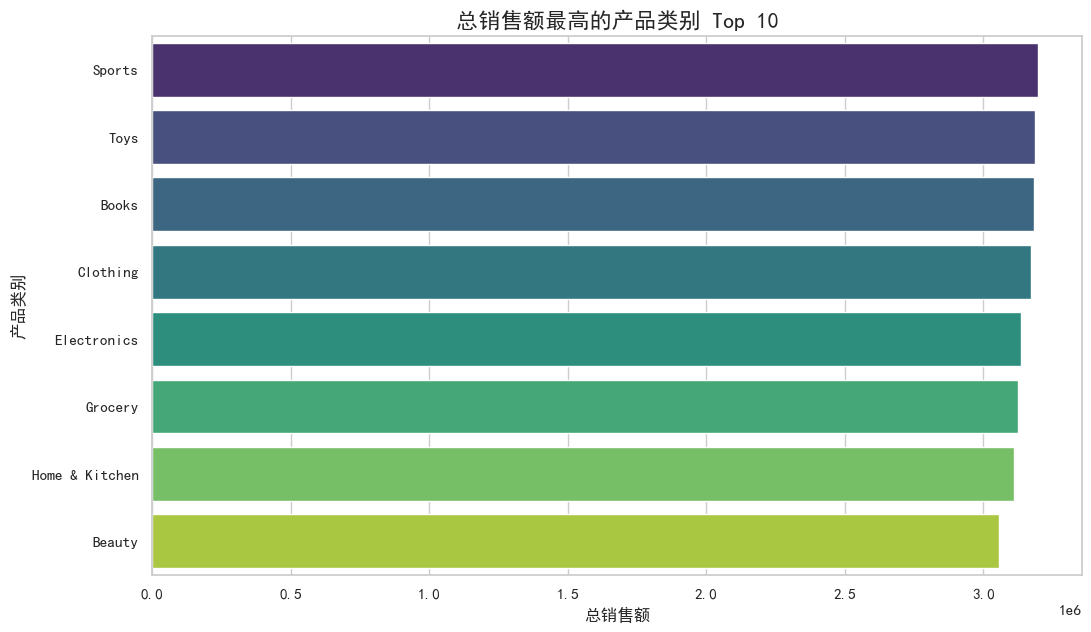

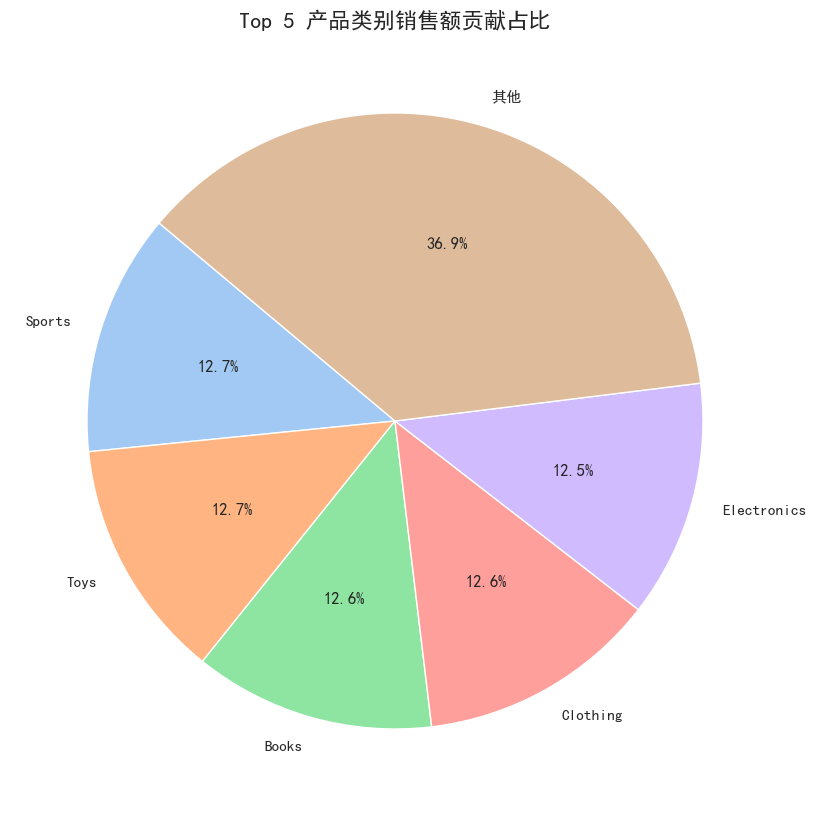

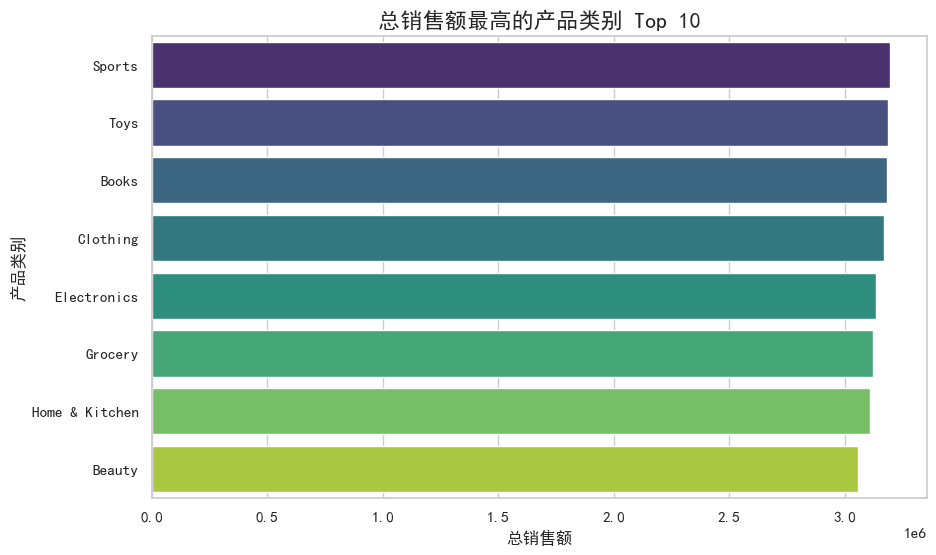

In [12]:
# --- 产品分析可视化 ---
print("\n=== 产品分析可视化图表 ===")

# 1. 热销产品类别 Top 10 条形图
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Total_Sales',
    y='Product_Category',
    data=hot_selling_by_sales.head(10),
    palette='viridis'
)
plt.title('总销售额最高的产品类别 Top 10', fontsize=16)
plt.xlabel('总销售额', fontsize=12)
plt.ylabel('产品类别', fontsize=12)
plt.show()

# 2. 销售额贡献占比饼图 (适合类别不多时使用)
# 如果类别太多，饼图会很难看，建议只展示Top 5 + 其他
top_n = 5
pie_data = hot_selling_by_sales.head(top_n).copy()
other_sales = hot_selling_by_sales.iloc[top_n:]['Total_Sales'].sum()
# 使用 pd.concat 代替 append
other_row = pd.DataFrame([{'Product_Category': '其他', 'Total_Sales': other_sales}])
pie_data = pd.concat([pie_data, other_row], ignore_index=True)


plt.figure(figsize=(10, 10))
plt.pie(
    pie_data['Total_Sales'],
    labels=pie_data['Product_Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title(f'Top {top_n} 产品类别销售额贡献占比', fontsize=16)
plt.ylabel('') # 隐藏y轴标签
plt.show()

# 3. 用户购买多样性分布直方图
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Sales',
    y='Product_Category',
    data=hot_selling_by_sales.head(10),
    palette='viridis',
    hue='Product_Category',  # ⬅️ 关键：明确告诉Seaborn按哪个变量上色
    legend=False             # ⬅️ 关键：不显示图例，保持图表简洁
)
plt.title('总销售额最高的产品类别 Top 10', fontsize=16)
plt.xlabel('总销售额', fontsize=12)
plt.ylabel('产品类别', fontsize=12)
plt.show()

In [13]:
# --- 3.1 支付方式偏好分析 ---
# 按支付方式分组，计算交易次数和总金额
payment_summary = df.groupby('Payment_Method').agg(
    Transaction_Count=('Transaction_ID', 'count'),
    Total_Amount=('Purchase_Amount', 'sum')
).sort_values(by='Transaction_Count', ascending=False).reset_index()

# 计算每种支付方式的占比
total_transactions = df.shape[0]
payment_summary['Percentage'] = (payment_summary['Transaction_Count'] / total_transactions) * 100

print("\n--- 各支付方式使用情况统计 ---")
print(payment_summary)

print("\n[分析想法]就数据而言支付方式分散，都有用，所以要保留所有支付方式。")


--- 各支付方式使用情况统计 ---
     Payment_Method  Transaction_Count  Total_Amount  Percentage
0               UPI               8477    4259355.65      16.954
1  Cash on Delivery               8434    4276269.38      16.868
2        Debit Card               8355    4234776.21      16.710
3       Credit Card               8310    4150547.15      16.620
4            PayPal               8250    4173529.85      16.500
5       Net Banking               8174    4063511.41      16.348

[分析想法]就数据而言支付方式分散，都有用，所以要保留所有支付方式。


In [14]:
# --- 3.2 交易金额分布分析 ---
print("\n--- 交易金额描述性统计 ---")
print(df['Purchase_Amount'].describe())

# 解读 .describe() 的输出
mean_value = df['Purchase_Amount'].mean()
median_value = df['Purchase_Amount'].median() # 也就是 50% 分位数
print(f"\n平均交易金额: {mean_value:.2f}")
print(f"交易金额中位数: {median_value:.2f}")

if mean_value > median_value:
    print("\n[分析结论] 平均值大于中位数，说明数据中存在一些金额非常高的大额订单，拉高了整体平均水平。大部分订单的实际金额可能更接近中位数。")
else:
    print("\n[分析结论] 数据分布较为均匀，或存在部分小额订单。")




--- 交易金额描述性统计 ---
count    50000.000000
mean       503.159793
std        286.563558
min          5.040000
25%        255.450000
50%        503.110000
75%        751.162500
max        999.980000
Name: Purchase_Amount, dtype: float64

平均交易金额: 503.16
交易金额中位数: 503.11

[分析结论] 平均值大于中位数，说明数据中存在一些金额非常高的大额订单，拉高了整体平均水平。大部分订单的实际金额可能更接近中位数。



=== 交易与支付方式可视化图表 ===


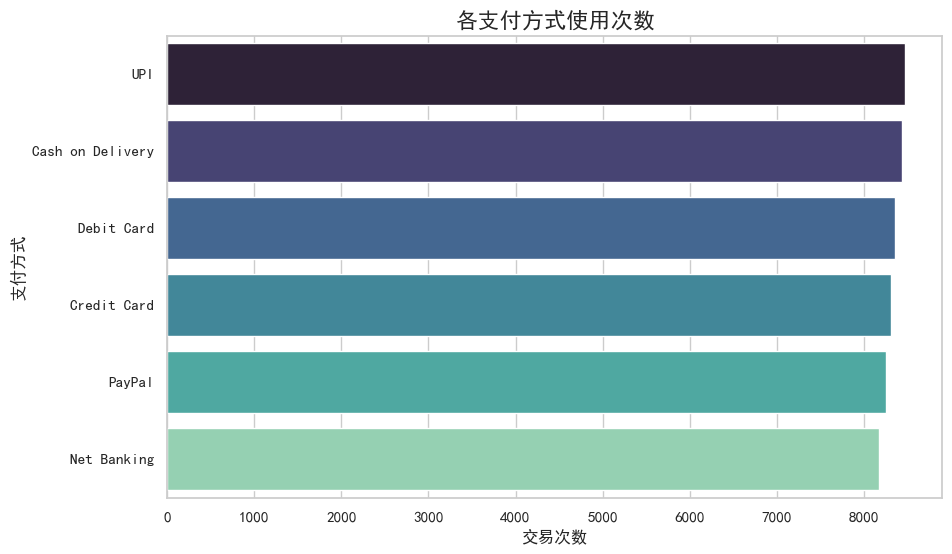

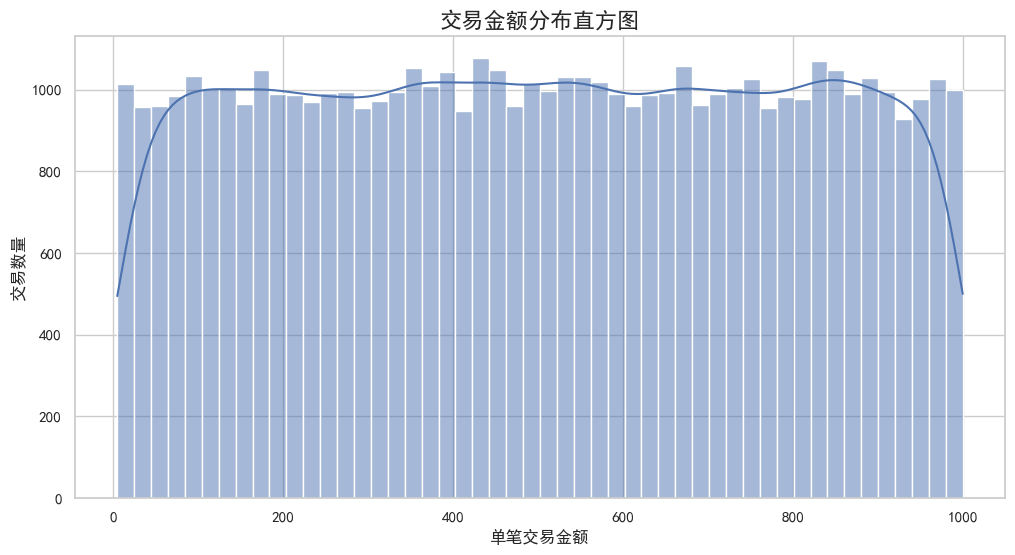

渲染器已设置为 'notebook_connected'，现在开始绘图...


[箱线图解读]本次分析的数据中，交易金额分布非常集中，没有出现极端的高消费或低消费订单。
中位数：所有订单金额的中位数大约在 550 左右，这代表了最具代表性的订单金额。
主要消费区间：中间 50% 的订单金额（由蓝色方框代表）集中在 400 到 600 这个相当窄的范围内，整体金额在200到800之间 
这说明平台的客单价非常稳定，用户消费行为很一致。这对于库存管理和常规定价策略来说是个好消息，但也可能意味着平台目前缺少能够带来超高收入的富豪，或者这类高价值交易没有体现在数据中


In [15]:
# --- 交易与支付方式可视化 ---
print("\n=== 交易与支付方式可视化图表 ===")

# 1. 支付方式使用次数条形图
plt.figure(figsize=(10, 6))
sns.barplot(
    data=payment_summary,
    x='Transaction_Count',
    y='Payment_Method',
    palette='mako',
    hue='Payment_Method', # 遵循新的Seaborn规范
    legend=False
)
plt.title('各支付方式使用次数', fontsize=16)
plt.xlabel('交易次数', fontsize=12)
plt.ylabel('支付方式', fontsize=12)
plt.show()


# 2. 交易金额分布直方图
# 直方图可以清晰地看到金额区间的分布情况
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='Purchase_Amount',
    bins=50,  # 将金额范围切成50个小区间
    kde=True  # 同时绘制一条平滑的密度曲线
)
plt.title('交易金额分布直方图', fontsize=16)
plt.xlabel('单笔交易金额', fontsize=12)
plt.ylabel('交易数量', fontsize=12)
plt.show()


# 3. 交易金额箱线图 (Box Plot)
# 箱线图能非常直观地展示中位数、四分位数和异常值（离群点）
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
print("渲染器已设置为 '{}'，现在开始绘图...".format(pio.renderers.default))

# 你的原始绘图代码（无需改动）
fig3 = px.box(
    df,
    x='Purchase_Amount',
    orientation='h', # 水平方向
    title='交易金额箱线图',
    labels={'Purchase_Amount': '单笔交易金额'}
)

# 添加更详细的悬停信息
fig3.update_traces(
    hovertemplate='<b>统计量</b><br>最大值: %{x[1]}<br>上四分位数: %{q3}<br>中位数: %{med}<br>下四分位数: %{q1}<br>最小值: %{x[0]}<extra></extra>'
)

# 使用 fig.show() 来显示图表
fig3.show()
print("[箱线图解读]本次分析的数据中，交易金额分布非常集中，没有出现极端的高消费或低消费订单。\n中位数：所有订单金额的中位数大约在 550 左右，这代表了最具代表性的订单金额。")
print("主要消费区间：中间 50% 的订单金额（由蓝色方框代表）集中在 400 到 600 这个相当窄的范围内，整体金额在200到800之间 ")
print("这说明平台的客单价非常稳定，用户消费行为很一致。这对于库存管理和常规定价策略来说是个好消息，但也可能意味着平台目前缺少能够带来超高收入的富豪，或者这类高价值交易没有体现在数据中")


In [16]:
# --- 4.0 准备工作：处理日期列 ---
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# 从日期中提取新的时间维度
df['YearMonth'] = df['Transaction_Date'].dt.to_period('M') # 年-月
df['DayOfWeek'] = df['Transaction_Date'].dt.day_name()      # 星期几 (英文)
df['DayOfMonth'] = df['Transaction_Date'].dt.day           # 月份中的天 (1-31)

print("日期列已处理完毕，并提取了 YearMonth, DayOfWeek, DayOfMonth 三个新维度。")
print(df[['Transaction_Date', 'YearMonth', 'DayOfWeek', 'DayOfMonth']].head())

日期列已处理完毕，并提取了 YearMonth, DayOfWeek, DayOfMonth 三个新维度。
  Transaction_Date YearMonth  DayOfWeek  DayOfMonth
0       2023-04-14   2023-04     Friday          14
1       2023-07-30   2023-07     Sunday          30
2       2023-09-17   2023-09     Sunday          17
3       2023-06-21   2023-06  Wednesday          21
4       2024-10-29   2024-10    Tuesday          29


In [17]:
# --- 4.1 销售趋势分析 (按月) ---

# 按月聚合计算总销售额
monthly_sales = df.groupby('YearMonth')['Purchase_Amount'].sum().reset_index()
# 将 YearMonth 转换为字符串，方便绘图
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

print("\n--- 每月总销售额统计 ---")
print(monthly_sales)

# --- 可视化：月度销售额折线图 ---
# 使用 Plotly 创建交互式折线图
import plotly.express as px

fig_monthly = px.line(
    monthly_sales,
    x='YearMonth',
    y='Purchase_Amount',
    title='月度销售额趋势图',
    markers=True, # 在每个数据点上显示标记
    labels={'YearMonth': '月份', 'Purchase_Amount': '总销售额'}
)
fig_monthly.update_layout(xaxis_title="月份", yaxis_title="总销售额")
fig_monthly.show()


--- 每月总销售额统计 ---
   YearMonth  Purchase_Amount
0    2023-03        802390.44
1    2023-04       1046921.48
2    2023-05       1050553.40
3    2023-06       1011635.06
4    2023-07       1105402.88
5    2023-08       1044738.24
6    2023-09       1030080.62
7    2023-10       1046800.13
8    2023-11       1016654.63
9    2023-12       1071642.15
10   2024-01       1101023.49
11   2024-02       1004235.75
12   2024-03       1018957.55
13   2024-04       1047109.76
14   2024-05       1070447.76
15   2024-06       1032452.78
16   2024-07       1065266.58
17   2024-08       1061115.60
18   2024-09       1034725.55
19   2024-10       1079380.33
20   2024-11       1065021.09
21   2024-12       1061061.79
22   2025-01       1056467.57
23   2025-02        960776.35
24   2025-03        273128.67


In [18]:
# --- 4.2 销售周期性分析 (按星期) ---
# 按星期几聚合，计算总销售额
sales_by_dow = df.groupby('DayOfWeek')['Purchase_Amount'].sum().reset_index()

# 为了让图表按正确的周一到周日顺序排序
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_dow['DayOfWeek'] = pd.Categorical(sales_by_dow['DayOfWeek'], categories=weekday_order, ordered=True)
sales_by_dow = sales_by_dow.sort_values('DayOfWeek')

print("\n--- 每周各天总销售额统计 ---")
print(sales_by_dow)

# --- 可视化：按星期分析的条形图 ---
fig_dow = px.bar(
    sales_by_dow,
    x='DayOfWeek',
    y='Purchase_Amount',
    title='一周内各天销售额对比',
    labels={'DayOfWeek': '星期', 'Purchase_Amount': '总销售额'}
)
fig_dow.update_layout(xaxis_title="星期", yaxis_title="总销售额")
fig_dow.show()

print("\n通过此图可以发现一周中的销售高峰和低谷，为安排营销活动、人员排班和服务器维护提供依据。")



--- 每周各天总销售额统计 ---
   DayOfWeek  Purchase_Amount
1     Monday       3612645.56
5    Tuesday       3476040.49
6  Wednesday       3591670.64
4   Thursday       3600219.11
0     Friday       3584535.90
2   Saturday       3613410.92
3     Sunday       3679467.03



通过此图可以发现一周中的销售高峰和低谷，为安排营销活动、人员排班和服务器维护提供依据。


In [19]:
print("--- 步骤 1: 重新构建包含 'Age_Group' 的用户特征表 ---")

# --- 从最原始的 df 数据出发，重新聚合计算 ---
# 这一步是为了确保我们得到一个干净的用户级别数据表
temp_user_summary = df.groupby("User_Name").agg(
    Age=("Age", "first"),
    Country=("Country", "first"),
    Total_Spend=("Purchase_Amount", "sum"),
    Total_Orders=("Transaction_ID", "count")
).reset_index()

# --- 关键：在这里直接为这个临时表添加 'Age_Group' 列 ---
bins = [0, 25, 40, 60, 100]
labels = ["Youth (<=25)", "Young Adult (26-40)", "Middle-aged (41-60)", "Senior (60+)"]
temp_user_summary["Age_Group"] = pd.cut(temp_user_summary["Age"], bins=bins, labels=labels, right=False)

# --- 将这个新鲜出炉、保证正确的数据表赋值给我们一直使用的变量名 ---
user_features_for_later = temp_user_summary.copy()

# --- 验证一下，确保 'Age_Group' 已经存在 ---
print("用户特征表已重建，现在的列包括:")
print(user_features_for_later.columns)
print("-" * 50)

--- 步骤 1: 重新构建包含 'Age_Group' 的用户特征表 ---
用户特征表已重建，现在的列包括:
Index(['User_Name', 'Age', 'Country', 'Total_Spend', 'Total_Orders',
       'Age_Group'],
      dtype='object')
--------------------------------------------------


In [20]:
# --- 5.1 不同年龄段的用户画像 ---
print("\n=== 5.1 不同年龄段的用户画像 ===")
age_group_summary = user_features_for_later.groupby('Age_Group').agg(
    User_Count=('User_Name', 'nunique'),
    Avg_Total_Spend=('Total_Spend', 'mean'),
    Total_Revenue_Contribution=('Total_Spend', 'sum')
).reset_index()
print("\n--- 各年龄段消费能力分析 ---\n", age_group_summary)

merged_df = pd.merge(df, user_features_for_later[['User_Name', 'Age_Group']], on='User_Name', how='left')
age_product_preference = merged_df.groupby(['Age_Group', 'Product_Category']).size().reset_index(name='Purchase_Count')
most_preferred_product = age_product_preference.loc[age_product_preference.groupby('Age_Group')['Purchase_Count'].idxmax()]
print("\n--- 各年龄段最偏好的产品类别 ---\n", most_preferred_product)

# --- 可视化 ---
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 创建一个 1 行 2 列的子图布局，并用 specs 参数指定每个子图的类型
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'xy'}, {'type': 'domain'}]],  # 修正：第一个是xy，第二个是domain
    subplot_titles=('各年龄段平均总消费', '各年龄段总收入贡献')
)

# 第一个图：条形图 (添加到 'xy' 类型的子图中)
fig.add_trace(
    go.Bar(x=age_group_summary['Age_Group'], y=age_group_summary['Avg_Total_Spend'], name='平均总消费'),
    row=1, col=1
)

# 第二个图：饼图 (添加到 'domain' 类型的子图中)
fig.add_trace(
    go.Pie(labels=age_group_summary['Age_Group'], values=age_group_summary['Total_Revenue_Contribution'], name='总收入贡献'),
    row=1, col=2
)
fig.update_layout(title_text="不同年龄段用户画像分析", height=500, showlegend=False)
fig.show()



=== 5.1 不同年龄段的用户画像 ===

--- 各年龄段消费能力分析 ---
              Age_Group  User_Count  Avg_Total_Spend  \
0         Youth (<=25)          23    249418.883478   
1  Young Adult (26-40)          24    252129.685833   
2  Middle-aged (41-60)          40    251554.291500   
3         Senior (60+)          13    254467.016154   

   Total_Revenue_Contribution  
0                  5736634.32  
1                  6051112.46  
2                 10062171.66  
3                  3308071.21  

--- 各年龄段最偏好的产品类别 ---
               Age_Group Product_Category  Purchase_Count
7          Youth (<=25)             Toys            1499
11  Young Adult (26-40)      Electronics            1539
23  Middle-aged (41-60)             Toys            2578
30         Senior (60+)           Sports             844


C:\Users\chen\AppData\Local\Temp\ipykernel_19692\2747947612.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\chen\AppData\Local\Temp\ipykernel_19692\2747947612.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\chen\AppData\Local\Temp\ipykernel_19692\2747947612.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [21]:
# --- 5.2 高价值用户画像 ---
print("\n=== 5.2 高价值用户画像 ===")
high_value_threshold = user_features_for_later['Total_Spend'].quantile(0.8)
high_value_users = user_features_for_later[user_features_for_later['Total_Spend'] >= high_value_threshold]
print(f"高价值用户的消费门槛为: {high_value_threshold:.2f}")
print(f"共有 {len(high_value_users)} 名高价值用户。")

high_value_age_dist = high_value_users['Age_Group'].value_counts(normalize=True).reset_index()
high_value_age_dist.columns = ['Age_Group', 'Percentage']
print("\n--- 高价值用户的年龄分布 ---\n", high_value_age_dist)

high_value_country_dist = high_value_users['Country'].value_counts(normalize=True).reset_index()
high_value_country_dist.columns = ['Country', 'Percentage']
print("\n--- 高价值用户的国家分布 (Top 5) ---\n", high_value_country_dist.head())

# --- 可视化 ---
fig_hv = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=('高价值用户的年龄构成', '高价值用户的国家构成'))
fig_hv.add_trace(go.Pie(labels=high_value_age_dist['Age_Group'], values=high_value_age_dist['Percentage'], scalegroup='one', name='年龄'), row=1, col=1)
top_n_countries = 5
country_pie_data = high_value_country_dist.head(top_n_countries)
other_percentage = 1 - country_pie_data['Percentage'].sum()
if other_percentage > 0:
    other_row = pd.DataFrame([{'Country': '其他国家', 'Percentage': other_percentage}])
    country_pie_data = pd.concat([country_pie_data, other_row], ignore_index=True)
fig_hv.add_trace(go.Pie(labels=country_pie_data['Country'], values=country_pie_data['Percentage'], scalegroup='one', name='国家'), row=1, col=2)
fig_hv.update_layout(title_text="高价值用户画像 (年龄与地域分布)", showlegend=False)
fig_hv.show()



=== 5.2 高价值用户画像 ===
高价值用户的消费门槛为: 261544.47
共有 20 名高价值用户。

--- 高价值用户的年龄分布 ---
              Age_Group  Percentage
0  Middle-aged (41-60)        0.55
1         Youth (<=25)        0.15
2  Young Adult (26-40)        0.15
3         Senior (60+)        0.15

--- 高价值用户的国家分布 (Top 5) ---
      Country  Percentage
0        USA        0.20
1     France        0.15
2  Australia        0.15
3    Germany        0.10
4     Mexico        0.10
